# MC906A - ALGORITMO GENÉTICO PARA RESOLVER SUDOKU
Gustavo Libraiz - 198537 \\
Lucas Rodrigues - 182557 \\
Matheus Mazon - 203609 \\
Vinícius Balbino de Souza - 178183 \\




Contribuições dos integrantes do grupo: 

Gustavo Libraiz e Lucas Domingues: Desenvolvimento do código de algoritmo genético em geral (seleção, mutação, métodos de substituição de população, etc)

Matheus Mazon e Vinícius Balbino: definição de puzzles e dificuldades,pré-processamento, análise de dados, mudanças de heuristicas, 

Todos os integrantes ajudaram na construção do notebook.

# Instalações iniciais

---


Nessa sessão são instaladas as dependências necessárias para que o relatório possa ser executado de maneira correta. Aqui você pode conferir as bibliotecas utilizadas, bem como o [código fonte](https://github.com/nugnu/IAProject2)

In [ ]:
% cd /content/
! git clone --recursive https://github.com/nugnu/IAProject2 src
% cd src
! git stash
! git pull origin master

/content
Cloning into 'src'...
remote: Enumerating objects: 193, done.
remote: Counting objects: 100% (193/193), done.
remote: Compressing objects: 100% (165/165), done.
remote: Total 193 (delta 64), reused 154 (delta 28), pack-reused 0
Receiving objects: 100% (193/193), 98.66 KiB | 4.70 MiB/s, done.
Resolving deltas: 100% (64/64), done.
/content/src
No local changes to save
From https://github.com/nugnu/IAProject2
 * branch            master     -> FETCH_HEAD
Already up to date.


In [ ]:
! pip install -r requirements.txt

     |████████████████████████████████| 20.2MB 1.4MB/s 
     |████████████████████████████████| 12.4MB 45.5MB/s 
     |████████████████████████████████| 901kB 45.9MB/s 
     |████████████████████████████████| 788kB 37.5MB/s 
     |████████████████████████████████| 2.1MB 41.0MB/s 
     |████████████████████████████████| 358kB 42.8MB/s 
ERROR: jupyter-console 5.2.0 has requirement prompt-toolkit<2.0.0,>=1.0.0, but you'll have prompt-toolkit 3.0.5 which is incompatible.
ERROR: google-colab 1.0.0 has requirement ipython~=5.5.0, but you'll have ipython 7.15.0 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5
  Found existing installation: matplotlib 3.2.1
    Uninstalling matp

In [ ]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import lines
from notebook import *

from ipywidgets import interact
import ipywidgets as widgets
from IPython.display import display
import time

from genetic_problems import *
from genetic_algorithm import *
from nakedSingles import *

# O Problema - SUDOKU

---

Sudoku é um jogo baseado na colocação lógica de números. O objetivo do jogo é a colocação de números de 1 a 9 em cada uma das células vazias numa grade de 9x9, constituída por 3x3 subgrades chamadas regiões. O quebra-cabeça contém algumas pistas iniciais, que são números inseridos em algumas células, de maneira a permitir uma indução ou dedução dos números em células que estejam vazias. Cada coluna, linha e região só pode ter um número de cada um dos 1 a 9. Resolver o problema requer apenas raciocínio lógico.



# Pré-Processamento

---

Para que o código genético não tenha que descobrir algarismos considerados óbvios da solução, é criado um pré-processamento para descobrir os _Naked Singles_ do puzzle. Na teoria de Sudoku, um _Naked Single_ significa que naquela célula específica só é possível haver um dígito dados os candidatos de linhas, colunas e quadrados. A função _Naked Singles_ realiza uma iteração de busca e os coloca no estado inicial do puzzle.

In [ ]:
psource(nakedSingles)

# Modelagem

Primeiro definimos o GeneticProblem, que possui como atributos básicos:

**initial:** problema inicial

**f_threshold:** o limiar aceitável para a função fitness. Se o fitness de algum indivíduo for maior ou igual a f_threshold, então o objetivo foi alcançado

**initial_population_size:** tamanho da população inicial

**max_ngen:** máximo número de gerações que podem ser geradas

**mut_rate:** probabilidade de mutação

**mut_type:** tipo de mutação

**crossover_rate:** probabilidade de recombinação entre indivíduos

**crossover_type:** tipo de recombinação

**selection_type:** método de seleção

**replacement_type:** método de substituir a população

**init_type:** método de inicializar a população


# Métodos



É obrigatório para toda classe que herda GeneticProblem, implementar os seguintes métodos:

**fitness:** Função fitness para classificar o indivíduo

**init_population:** Função para inicializar a população

**goal_test:** Função para checar se o objetivo foi completado

**selection:** Função de seleção de indivíduos

**crossover:** Função de recombinação entre indivíduos

**mutate:** Função de mutação

**replace_population:** Função de substituição de população


In [ ]:
psource(GeneticProblem)

# SudokuGeneticProblem

Herda a classe GeneticProblem e implementa:

# População inicial

Para o init_population foram definidos três métodos:

1.  init_type == "random": Preenche os espaços vazios do sudoku de forma 
completamente aleatória

2.   init_type == "permutation": Preenche os espaços vazios do sudoku utilizando uma permutação da solução = (1,2,3,4,5,6,7,8,9,1,2,3,4,5,6,7,8,9,1...)

3. init_type == "row_permutation": Preenche cada uma das linhas do sudoku (considerando os espaços vazios) utilizando uma permutação de (1,2,3,4,5,6,7,8,9)

# Seleção

Para o método de seleção, foram criados dois métodos:

1.  selection_type == "tournament":  Nele uma quantidade k de indivíduos será escolhida entre todas da população de forma aleatória e, entre esses k indivíduos, o melhor será selecionado para o crossover. São selecionados 2 indivíduos a partir desse método, e esses 2 fazem crossover.

2.   selection_type == "roulette": Um indivíduo será escolhido de forma aleatória, porém cada indivíduo terá um probabilidade de ser escolhido que aumenta com o valor da sua função fitness. São selecionados 2 indivíduos a partir desse método, e esses 2 fazem crossover. Quanto menor a população inicial, mais forte a roleta, isso é, seleciona indivíduos mais aptos quanto menor a população.

# Recombinação

Todos os métodos de recombinação preservam os espaços preenchidos (não nulos) do puzzle inicial.

Para o método de crossover, foram definidos três métodos:

1.  crossover_type == "one_point": Combinação entre dois indivíduos x e y. Cada indivíduo é um array de 81 posições. É escolhida uma posição c aleatória desse array e o novo indivíduo é formado composto de x até o número c, e a partir de c é formado pelo indivíduo y.

2.  crossover_type == "vertical_one_point": Ideia similar ao crossover one point, porém preserva as linhas inteiramente. Isto é, faz-se uma troca de linhas entre os dois indivíduos x e y, apenas alterando colunas

3. crossover_type == "vertical_two_point": Ideia similar ao vertical_one_point, só que é um crossover de dois pontos.

# Mutação

Todos os métodos de mutação preservam os espaços preenchidos do puzzle inicial.

Para o método de mutação, foram definidos três métodos principais:

1.  mutation_type == "flip": Escolhe uma posição aleatória do indivíduo e troca o número por outro número aleatório.

2. mutation_type == "swap": Escolhe duas posições aleatórias do indivíduo e faz-se uma troca de seus valores.

3. mutation_type == "horizontal_swap": Similar ao swap, porém escolhe uma linha e faz o swap em números em uma mesma linha.

# Substituição da População

Para o método de substituição de população, foram definidos três métodos principais:

1.  replacement_type == "elitism": Substitui a população anterior de tamanho n inteiramente por outra população de tamanho n-1. Cada indivíduo da nova população é formado pela seleção de dois indivíduos da população anterior, que passam por crossover e esse novo indivíduo passa por mutação. Ao fim, apenas o indivíduo com maior fitness da população anterior, é adicionado à nova população. Com esse novo indivíduo adicionado, a população passa a ter n indivíduos novamente.

1.  replacement_type == "elitism_grow": Ideia similar ao elitism, mas a população vai crescendo de 1 unidade à cada nova geração

# Goal Test

Checa se o número máximo de gerações foi atingido ou se f_threshold foi atingido ou se de fato, chegamos em uma solução. A solução foi definida como a fitness máxima de 243.

# Fitness

Foi definida como a soma de elementos distintos em cada uma das linhas, colunas e quadrados 3x3 do sudoku. O score máximo é 243. Em especial, se misturamos as técnicas init_type == "row_permutation", mutation_type == "horizontal_swap" e crossover_type == "vertical_one_point" ou crossover_type == "vertical_two_point", preservamos que cada linha é composta sempre de elementos distintos. Dessa maneira, nesses casos, podemos calcular o fitness function de maneira mais eficiente, apenas calculando o fitness para as colunas e quadrados 3x3.



# Previsão

A previsão inicial, era de que utilizar a combinação de crossover vertical, com mutação de swap horizontal e inicialização com base em permutações de linhas, seria a melhor forma disponível para resolver o SUDOKU, pois se aproveitava melhor da estrutura do sudoku e é mais eficiente.










In [ ]:
psource(SudokuGeneticProblem)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# GENETIC ALGORITHM

As funções mais complexas estão definidas em SudokuGeneticProblem. O genetic_algorithm é responsável por chamar problem.replace_population() para criar uma nova geração. Além disso, é responsável por detectar se a solução foi atingida ou se a população está presa em um máximo local. No caso da população estar presa em uma máximo local, ele desiste da população, sacrificando KILL_PERCENT indivíduos e inicializando uma nova população.

No caso do problema usar método de roleta, a população é sacrificada em circunstâncias muito mais tênues. Um stale de apenas 10 gerações PODE ser considerada suficiente para sacrificar a população, nesse caso. Fizemos isso, pois o método da roleta tende a se convergir muito mais rapidamente que o método de torneio, no nosso algoritmo, e portanto, chegamos a máximos locais muito rapidamente, o que pode fazer com que a população tenda à uma configuração próxima à solução, mas incorreta.

In [ ]:
psource(genetic_algorithm)

# ANÁLISE DE PARÂMETROS

Criando a estrutura para guardar os puzzles

In [ ]:
from genetic_problems import *
from genetic_algorithm import *
import numpy as np
from load_sudoku import *
import os
from glob import glob 

cwd = os.getcwd()

puzzlesPath = os.path.join(cwd, "puzzles/")
defaultPuzzleExtension = ".in"
puzzles = glob(puzzlesPath + "*" + defaultPuzzleExtension)
filename_initial_dict = {}
for puzzle in puzzles:
    basename = os.path.basename(puzzle)
    filename = os.path.splitext(basename)[0]
    filename_initial_dict.update( {
            filename: load_puzzle(puzzle)
        }
    )

Para acessar os puzzles, faz-se filename_initial_dict["nome_do_arquivo"]. Os arquivos com os puzzles SUDOKU foram encontrados em http://lipas.uwasa.fi/~timan/sudoku/. Na última seção desse notebook, foram resolvidos puzzles de nível 1 ao 5.

Exemplo: Criando um problema com as configurações padrão definidas na classe:


In [ ]:
problem = SudokuGeneticProblem(filename_initial_dict["s01a"])

INITIAL PROBLEM:
[[0 4 0 0 0 0 1 7 9]
 [0 0 2 0 0 8 0 5 4]
 [0 0 6 0 0 5 0 0 8]
 [0 8 0 0 7 0 9 1 0]
 [0 5 0 0 9 0 0 3 0]
 [0 1 9 0 6 0 0 4 0]
 [3 0 0 4 0 0 7 0 0]
 [5 7 0 1 0 0 2 0 0]
 [9 2 8 0 0 0 0 6 0]]

INITIAL PROBLEM AFTER NAKED_SINGLES PRE-PROCESSING:
[[8 4 0 0 0 0 1 7 9]
 [0 0 2 0 0 8 0 5 4]
 [0 0 6 0 0 5 3 2 8]
 [0 8 0 0 7 0 9 1 0]
 [0 5 0 0 9 0 0 3 0]
 [0 1 9 0 6 0 0 4 0]
 [3 6 1 4 0 0 7 0 0]
 [5 7 4 1 0 0 2 0 3]
 [9 2 8 0 0 0 0 6 0]]



Para comparar diferentes configurações, executamos o algoritmo dez vezes para dois arquivos diferentes. O número máximo de gerações foi setado para 700.

Configuração 1 - Configuração Padrão

A configuração padrão é:

1.  initial_population_size = 1000
2.  max_ngen = 10000
3.  mut_rate = 0.5
4.  crossover_rate = 1
5.  mut_type = "horizontal_swap"
6.  crossover_type = "vertical_one_point"
7.  selection_type = "tournament"
8.  replacement_type = "elitism"
9.  init_type = "row_permutation"

Como essa configuração é dotada de crossover vertical, mutação horizontal e inicialização por permutação de linhas, prevê-se que é uma boa configuração, visto que se aproveita da estrutura do programa e é mais eficiente.










In [ ]:
n = 10
files = ["s01a", "s01b"]
time_spent_array = []
generation_count_array = []

for file in files:
  for _ in range(n):
    problem = problem = SudokuGeneticProblem(filename_initial_dict[file], max_ngen=700, verbose=False)
    (solution, number_of_generations, time_spent) = genetic_algorithm(problem, verbose=False)
    time_spent_array.append(time_spent)
    generation_count_array.append(number_of_generations)

avg_time_spent = sum(time_spent_array)/len(time_spent_array)
print(time_spent_array)
print("TEMPO GASTO EM MEDIA: " + str(avg_time_spent) + " SEGUNDOS\n")


avg_generation_count = int(sum(generation_count_array)/len(generation_count_array))
print(generation_count_array)
print("GERACOES GERADAS EM MEDIA: " + str(avg_generation_count) + "\n")

[5.7384092807769775, 22.08872365951538, 40.27895641326904, 4.280133962631226, 6.242390155792236, 4.394836902618408, 4.691728353500366, 5.0625691413879395, 6.348236322402954, 5.984647512435913, 2.854929208755493, 4.3133931159973145, 2.6944992542266846, 2.816542387008667, 2.5273375511169434, 3.3701813220977783, 2.9167966842651367, 2.8594472408294678, 2.349820613861084, 3.1992037296295166]
TEMPO GASTO EM MEDIA: 6.7506391406059265 SEGUNDOS

[32, 131, 240, 24, 36, 25, 27, 28, 37, 34, 16, 25, 15, 16, 14, 19, 16, 16, 13, 18]
GERACOES GERADAS EM MEDIA: 39



Configuração 2 - Similar a configuração padrão, mas com vertical_two_point_crossover. É esperado um resultado bastante similar ao de one point crossover.

In [ ]:
n = 10
files = ["s01a", "s01b"]
time_spent_array = []
generation_count_array = []

for file in files:
  for _ in range(n):
    problem = SudokuGeneticProblem(filename_initial_dict[file], crossover_type="vertical_two_point", max_ngen=700, verbose=False)
    (solution, number_of_generations, time_spent) = genetic_algorithm(problem, verbose=False)
    time_spent_array.append(time_spent)
    generation_count_array.append(number_of_generations)

avg_time_spent = sum(time_spent_array)/len(time_spent_array)
print(time_spent_array)
print("TEMPO GASTO EM MEDIA: " + str(avg_time_spent) + " SEGUNDOS\n")


avg_generation_count = int(sum(generation_count_array)/len(generation_count_array))
print(generation_count_array)
print("GERACOES GERADAS EM MEDIA: " + str(avg_generation_count) + "\n")

[5.295541763305664, 4.982255697250366, 4.318800449371338, 5.776596307754517, 4.821862697601318, 5.06976580619812, 37.95232844352722, 4.724108695983887, 4.488395929336548, 4.94867730140686, 2.881011724472046, 3.353750467300415, 4.056540489196777, 2.3838746547698975, 2.8593859672546387, 3.0237371921539307, 3.5383448600769043, 2.8617048263549805, 3.269055128097534, 3.403750419616699]
TEMPO GASTO EM MEDIA: 5.700474441051483 SEGUNDOS

[30, 28, 24, 33, 27, 28, 224, 26, 25, 28, 16, 19, 23, 13, 16, 17, 20, 16, 18, 19]
GERACOES GERADAS EM MEDIA: 32



Configuração 3 - Similar à configuração padrão, mas com mut_rate = 0.3. Como acreditamos que o problema de sudoku necessita de mut_rate alto para fugir de máximos locais, acreditamos que o mut_rate = 0.5 é uma configuração melhor.



In [ ]:
n = 10
files = ["s01a", "s01b"]
time_spent_array = []
generation_count_array = []

for file in files:
  for _ in range(n):
    problem = SudokuGeneticProblem(filename_initial_dict[file], mut_rate=0.3, max_ngen=700, verbose=False)
    (solution, number_of_generations, time_spent) = genetic_algorithm(problem, verbose=False)
    time_spent_array.append(time_spent)
    generation_count_array.append(number_of_generations)

avg_time_spent = sum(time_spent_array)/len(time_spent_array)
print(time_spent_array)
print("TEMPO GASTO EM MEDIA: " + str(avg_time_spent) + " SEGUNDOS\n")


avg_generation_count = int(sum(generation_count_array)/len(generation_count_array))
print(generation_count_array)
print("GERACOES GERADAS EM MEDIA: " + str(avg_generation_count) + "\n")

[5.530578374862671, 37.99509263038635, 4.0514209270477295, 4.6311304569244385, 52.12165689468384, 4.160001993179321, 17.378304958343506, 54.1154568195343, 6.461710691452026, 3.650200366973877, 2.980142831802368, 3.1131134033203125, 3.286604166030884, 2.970600128173828, 5.593502521514893, 3.4429421424865723, 3.4679739475250244, 3.275442361831665, 3.7063076496124268, 2.9983839988708496]
TEMPO GASTO EM MEDIA: 11.246528363227844 SEGUNDOS

[32, 232, 23, 27, 316, 24, 104, 336, 38, 21, 17, 18, 19, 17, 33, 20, 20, 19, 22, 17]
GERACOES GERADAS EM MEDIA: 67



Configuração 4 - Similar à configuração 2, mas com mut_rate = 0.3. As mesmas considerações acima.

In [ ]:
n = 10
files = ["s01a", "s01b"]
time_spent_array = []
generation_count_array = []

for file in files:
  for _ in range(n):
    problem = SudokuGeneticProblem(filename_initial_dict[file], mut_rate=0.3, crossover_type="vertical_two_point", max_ngen=700, verbose=False)
    (solution, number_of_generations, time_spent) = genetic_algorithm(problem, verbose=False)
    time_spent_array.append(time_spent)
    generation_count_array.append(number_of_generations)

avg_time_spent = sum(time_spent_array)/len(time_spent_array)
print(time_spent_array)
print("TEMPO GASTO EM MEDIA: " + str(avg_time_spent) + " SEGUNDOS\n")


avg_generation_count = int(sum(generation_count_array)/len(generation_count_array))
print(generation_count_array)
print("GERACOES GERADAS EM MEDIA: " + str(avg_generation_count) + "\n")

[20.56322145462036, 21.46971893310547, 4.530269145965576, 5.090475082397461, 24.004780054092407, 21.022603273391724, 4.384225845336914, 4.142294645309448, 4.864660024642944, 36.54076337814331, 2.254521369934082, 2.6910934448242188, 2.202488899230957, 2.689079999923706, 2.182795524597168, 3.002058744430542, 2.3139827251434326, 2.9388084411621094, 2.932565212249756, 3.1288259029388428]
TEMPO GASTO EM MEDIA: 8.64746160507202 SEGUNDOS

[123, 128, 26, 29, 144, 126, 25, 23, 28, 221, 12, 15, 12, 15, 12, 17, 13, 17, 17, 18]
GERACOES GERADAS EM MEDIA: 51



Configuração 5 - Similar à configuração padrão, mas com método de replacement que aumenta a população ao longo do tempo. A priori, não sabemos se é melhor que a configuração de população estática.

In [ ]:
n = 10
files = ["s01a", "s01b"]
time_spent_array = []
generation_count_array = []

for file in files:
  for _ in range(n):
    problem = SudokuGeneticProblem(filename_initial_dict[file], replacement_type="elitism_grow", max_ngen=700, verbose=False)
    (solution, number_of_generations, time_spent) = genetic_algorithm(problem, verbose=False)
    time_spent_array.append(time_spent)
    generation_count_array.append(number_of_generations)

avg_time_spent = sum(time_spent_array)/len(time_spent_array)
print(time_spent_array)
print("TEMPO GASTO EM MEDIA: " + str(avg_time_spent) + " SEGUNDOS\n")


avg_generation_count = int(sum(generation_count_array)/len(generation_count_array))
print(generation_count_array)
print("GERACOES GERADAS EM MEDIA: " + str(avg_generation_count) + "\n")

[22.763646125793457, 4.4949305057525635, 31.373666524887085, 22.784127473831177, 4.961313724517822, 39.20377779006958, 6.854044437408447, 30.414631128311157, 54.1858594417572, 22.85540008544922, 4.378727674484253, 2.726137161254883, 2.892622232437134, 2.6963071823120117, 3.178961753845215, 2.700035572052002, 2.2407257556915283, 4.377334356307983, 2.6648619174957275, 3.7233424186706543]
TEMPO GASTO EM MEDIA: 13.573522663116455 SEGUNDOS

[130, 25, 180, 130, 28, 222, 39, 171, 308, 130, 25, 15, 16, 15, 18, 15, 12, 25, 15, 21]
GERACOES GERADAS EM MEDIA: 77



Configuração 6 - Similar à configuração 2, mas com método de replacement que aumenta a população ao longo do tempo. A priori, não sabemos se é melhor que a configuração de população estática.

In [ ]:
n = 10
files = ["s01a", "s01b"]
time_spent_array = []
generation_count_array = []

for file in files:
  for _ in range(n):
    problem = SudokuGeneticProblem(filename_initial_dict[file], crossover_type = "vertical_two_point", replacement_type="elitism_grow", max_ngen=700, verbose=False)
    (solution, number_of_generations, time_spent) = genetic_algorithm(problem, verbose=False)
    time_spent_array.append(time_spent)
    generation_count_array.append(number_of_generations)

avg_time_spent = sum(time_spent_array)/len(time_spent_array)
print(time_spent_array)
print("TEMPO GASTO EM MEDIA: " + str(avg_time_spent) + " SEGUNDOS\n")


avg_generation_count = int(sum(generation_count_array)/len(generation_count_array))
print(generation_count_array)
print("GERACOES GERADAS EM MEDIA: " + str(avg_generation_count) + "\n")

[5.9609503746032715, 6.907025337219238, 4.07710337638855, 4.646227836608887, 5.00706672668457, 5.204878568649292, 5.352850437164307, 4.275287628173828, 39.47170805931091, 5.947399139404297, 2.3925459384918213, 2.877779006958008, 4.736270189285278, 2.0445947647094727, 4.389266490936279, 2.714426279067993, 1.889307975769043, 3.535010576248169, 2.893984317779541, 3.2264156341552734]
TEMPO GASTO EM MEDIA: 5.877504932880401 SEGUNDOS

[33, 39, 22, 26, 28, 29, 30, 23, 223, 33, 13, 16, 27, 11, 25, 15, 10, 20, 16, 18]
GERACOES GERADAS EM MEDIA: 32



Configuração 7 - Configuração Padrão, porém com one_point_crossover (aleatório, não vertical). Acreditamos que essa solução será bem pior que as primeiras configurações.

In [ ]:
n = 10
files = ["s01a", "s01b"]
time_spent_array = []
generation_count_array = []

for file in files:
  for _ in range(n):
    problem = SudokuGeneticProblem(filename_initial_dict[file], crossover_type = "one_point", max_ngen=700, verbose=False)
    (solution, number_of_generations, time_spent) = genetic_algorithm(problem, verbose=False)
    time_spent_array.append(time_spent)
    generation_count_array.append(number_of_generations)

avg_time_spent = sum(time_spent_array)/len(time_spent_array)
print(time_spent_array)
print("TEMPO GASTO EM MEDIA: " + str(avg_time_spent) + " SEGUNDOS\n")


avg_generation_count = int(sum(generation_count_array)/len(generation_count_array))
print(generation_count_array)
print("GERACOES GERADAS EM MEDIA: " + str(avg_generation_count) + "\n")

[137.97829365730286, 104.2565610408783, 73.54115605354309, 77.48070454597473, 53.37464094161987, 52.63036561012268, 9.65992784500122, 32.700762033462524, 98.55107736587524, 186.80297875404358, 5.796257972717285, 5.498913526535034, 5.573312282562256, 7.059109926223755, 7.096449851989746, 7.130296230316162, 5.867430210113525, 5.8582658767700195, 5.262713670730591, 6.098858118057251]
TEMPO GASTO EM MEDIA: 44.410903775691985 SEGUNDOS

[514, 389, 275, 291, 198, 196, 35, 120, 369, 700, 21, 20, 20, 26, 26, 26, 21, 21, 19, 22]
GERACOES GERADAS EM MEDIA: 165



Configuração 8 - Configuração padrão porém com mutação que faz trocas sem preservar as linhas. Acreditamos que essa solução será bem pior que as primeiras configurações.





In [ ]:
n = 10
files = ["s01a", "s01b"]
time_spent_array = []
generation_count_array = []

for file in files:
  for _ in range(n):
    problem = SudokuGeneticProblem(filename_initial_dict[file], mut_type = "swap", max_ngen=700, verbose=False)
    (solution, number_of_generations, time_spent) = genetic_algorithm(problem, verbose=False)
    time_spent_array.append(time_spent)
    generation_count_array.append(number_of_generations)

avg_time_spent = sum(time_spent_array)/len(time_spent_array)
print(time_spent_array)
print("TEMPO GASTO EM MEDIA: " + str(avg_time_spent) + " SEGUNDOS\n")


avg_generation_count = int(sum(generation_count_array)/len(generation_count_array))
print(generation_count_array)
print("GERACOES GERADAS EM MEDIA: " + str(avg_generation_count) + "\n")

[190.8675467967987, 16.584261417388916, 194.1201503276825, 38.72592544555664, 55.0421187877655, 112.177170753479, 116.23086643218994, 87.20066237449646, 187.03726363182068, 16.510215997695923, 39.16568374633789, 11.70359182357788, 14.765412330627441, 11.042816638946533, 10.495755672454834, 9.763516664505005, 8.462353944778442, 12.687474966049194, 12.765456438064575, 12.974411010742188]
TEMPO GASTO EM MEDIA: 57.916132760047915 SEGUNDOS

[700, 59, 700, 139, 197, 417, 422, 316, 667, 60, 143, 43, 54, 41, 38, 35, 30, 45, 48, 47]
GERACOES GERADAS EM MEDIA: 210



Configuração 9 - Configuração padrão, porém com mutação com preenchimento de genes aleatório (pode gerar duplicatas). Acreditamos que essa solução será bem pior que as primeiras configurações.

In [ ]:
n = 10
files = ["s01a", "s01b"]
time_spent_array = []
generation_count_array = []

for file in files:
  for _ in range(n):
    problem = SudokuGeneticProblem(filename_initial_dict[file], mut_type = "flip", max_ngen=700, verbose=False)
    (solution, number_of_generations, time_spent) = genetic_algorithm(problem, verbose=False)
    time_spent_array.append(time_spent)
    generation_count_array.append(number_of_generations)

avg_time_spent = sum(time_spent_array)/len(time_spent_array)
print(time_spent_array)
print("TEMPO GASTO EM MEDIA: " + str(avg_time_spent) + " SEGUNDOS\n")


avg_generation_count = int(sum(generation_count_array)/len(generation_count_array))
print(generation_count_array)
print("GERACOES GERADAS EM MEDIA: " + str(avg_generation_count) + "\n")

[83.17898154258728, 79.47735857963562, 20.375845432281494, 79.97525310516357, 81.61728739738464, 83.30102229118347, 8.610218524932861, 79.94237279891968, 80.05185532569885, 76.02904176712036, 71.32266163825989, 33.34095859527588, 32.47833061218262, 8.713892459869385, 19.101062536239624, 9.92354416847229, 56.9242377281189, 19.82333207130432, 4.1144232749938965, 13.46774673461914]
TEMPO GASTO EM MEDIA: 47.08847132921219 SEGUNDOS

[300, 300, 74, 300, 300, 300, 29, 300, 300, 268, 263, 124, 121, 32, 71, 36, 215, 77, 15, 52]
GERACOES GERADAS EM MEDIA: 173



Configuração 10 - Mistura de todos os métodos. Não era esperado bons resultados.




In [ ]:
n = 10
files = ["s01a", "s01b"]
time_spent_array = []
generation_count_array = []

for file in files:
  for _ in range(n):
    problem = SudokuGeneticProblem(filename_initial_dict[file], crossover_type = "all", replacement_type="all", init_type="all", mut_type="all", max_ngen=700, verbose=False)
    (solution, number_of_generations, time_spent) = genetic_algorithm(problem, verbose=False)
    time_spent_array.append(time_spent)
    generation_count_array.append(number_of_generations)

avg_time_spent = sum(time_spent_array)/len(time_spent_array)
print(time_spent_array)
print("TEMPO GASTO EM MEDIA: " + str(avg_time_spent) + " SEGUNDOS\n")


avg_generation_count = int(sum(generation_count_array)/len(generation_count_array))
print(generation_count_array)
print("GERACOES GERADAS EM MEDIA: " + str(avg_generation_count) + "\n")

[76.14237856864929, 95.90146589279175, 32.12634086608887, 103.42373323440552, 103.76239204406738, 13.090346574783325, 19.58693289756775, 7.9019691944122314, 103.57469272613525, 99.93957471847534, 40.45383954048157, 18.771313905715942, 6.737207889556885, 8.080631494522095, 26.05979561805725, 31.216515064239502, 15.608794450759888, 22.707048416137695, 22.274559259414673, 13.370732545852661]
TEMPO GASTO EM MEDIA: 43.036513245105745 SEGUNDOS

[255, 300, 96, 300, 300, 47, 70, 27, 300, 300, 145, 55, 24, 29, 74, 95, 47, 65, 62, 49]
GERACOES GERADAS EM MEDIA: 132



Até aqui, a melhor configuração é a segunda.
A partir de agora, tentaremos descobrir qual a melhor configuração de seleção (roleta ou torneio). Além disso, verificaremos se populações de tamanho inicial devem ser maiores ou menores que o padrão (initial_population = 1000)

Configuração 11 - Similar à configuração 2, mas com método de seleção de roleta. Acreditamos, a priori, que o torneio será um melhor método de seleção, visto que é mais democrático (pode selecionar indivíduos considerados inaptos e evita máximos locais). O nosso algoritmo de roleta seleciona indivíduos aptos de maneira bem forte, o que pode gerar máximos locais.




In [ ]:
n = 10
files = ["s01a", "s01b"]
time_spent_array = []
generation_count_array = []

for file in files:
  for _ in range(n):
    problem = SudokuGeneticProblem(filename_initial_dict[file], crossover_type="vertical_two_point", max_ngen=700, selection_type="roulette", verbose=False)
    (solution, number_of_generations, time_spent) = genetic_algorithm(problem, verbose=False)
    time_spent_array.append(time_spent)
    generation_count_array.append(number_of_generations)

avg_time_spent = sum(time_spent_array)/len(time_spent_array)
print(time_spent_array)
print("TEMPO GASTO EM MEDIA: " + str(avg_time_spent) + " SEGUNDOS\n")


avg_generation_count = int(sum(generation_count_array)/len(generation_count_array))
print(generation_count_array)
print("GERACOES GERADAS EM MEDIA: " + str(avg_generation_count) + "\n")

[45.763091802597046, 48.074286460876465, 39.243045806884766, 43.19752049446106, 12.980543851852417, 68.09880757331848, 36.897847414016724, 76.04063296318054, 97.62109708786011, 12.475980520248413, 3.6068809032440186, 5.757184028625488, 5.735667705535889, 5.9384541511535645, 5.889106750488281, 11.318408250808716, 4.147231340408325, 19.09054207801819, 5.221509218215942, 5.4003095626831055]
TEMPO GASTO EM MEDIA: 27.624907398223876 SEGUNDOS

[82, 87, 71, 77, 23, 121, 66, 135, 173, 22, 6, 10, 10, 10, 10, 20, 7, 34, 9, 9]
GERACOES GERADAS EM MEDIA: 49



Configuração 12 - Similar à configuração 11, de roleta, mas com initial_population_size = 600.




In [ ]:
n = 10
files = ["s01a", "s01b"]
time_spent_array = []
generation_count_array = []

for file in files:
  for _ in range(n):
    problem = SudokuGeneticProblem(filename_initial_dict[file], crossover_type="vertical_two_point", max_ngen=700, selection_type="roulette",initial_population_size=600,verbose=False)
    (solution, number_of_generations, time_spent) = genetic_algorithm(problem, verbose=False)
    time_spent_array.append(time_spent)
    generation_count_array.append(number_of_generations)

avg_time_spent = sum(time_spent_array)/len(time_spent_array)
print(time_spent_array)
print("TEMPO GASTO EM MEDIA: " + str(avg_time_spent) + " SEGUNDOS\n")


avg_generation_count = int(sum(generation_count_array)/len(generation_count_array))
print(generation_count_array)
print("GERACOES GERADAS EM MEDIA: " + str(avg_generation_count) + "\n")

[58.15770220756531, 40.75854992866516, 49.08626461029053, 3.1273951530456543, 25.29725217819214, 2.6150424480438232, 27.666579246520996, 55.58684968948364, 137.18513298034668, 13.444524049758911, 1.9336483478546143, 1.4881441593170166, 3.247769832611084, 1.734065294265747, 1.6887402534484863, 1.9018802642822266, 1.9405663013458252, 2.844912052154541, 1.491650104522705, 8.568522214889526]
TEMPO GASTO EM MEDIA: 21.98825956583023 SEGUNDOS

[254, 178, 214, 13, 111, 11, 120, 244, 594, 59, 8, 6, 14, 7, 7, 8, 8, 12, 6, 37]
GERACOES GERADAS EM MEDIA: 95



Configuração 13 - Similar à configuração 11, de roleta, mas com initial_population_size = 1300.




In [ ]:
n = 10
files = ["s01a", "s01b"]
time_spent_array = []
generation_count_array = []

for file in files:
  for _ in range(n):
    problem = SudokuGeneticProblem(filename_initial_dict[file], crossover_type="vertical_two_point", max_ngen=700, selection_type="roulette",initial_population_size=1300,verbose=False)
    (solution, number_of_generations, time_spent) = genetic_algorithm(problem, verbose=False)
    time_spent_array.append(time_spent)
    generation_count_array.append(number_of_generations)

avg_time_spent = sum(time_spent_array)/len(time_spent_array)
print(time_spent_array)
print("TEMPO GASTO EM MEDIA: " + str(avg_time_spent) + " SEGUNDOS\n")


avg_generation_count = int(sum(generation_count_array)/len(generation_count_array))
print(generation_count_array)
print("GERACOES GERADAS EM MEDIA: " + str(avg_generation_count) + "\n")

[42.27463889122009, 48.05299711227417, 55.59060263633728, 17.648517370224, 10.980456829071045, 14.587955951690674, 89.77433943748474, 14.687762975692749, 12.977452754974365, 17.433498859405518, 8.294044971466064, 14.518792867660522, 11.082220315933228, 11.91223692893982, 11.04768967628479, 12.724257946014404, 8.375922203063965, 11.865894317626953, 6.53624701499939, 6.5717785358428955]
TEMPO GASTO EM MEDIA: 21.346865379810332 SEGUNDOS

[47, 54, 61, 19, 12, 16, 98, 16, 14, 19, 9, 16, 12, 13, 12, 14, 9, 13, 7, 7]
GERACOES GERADAS EM MEDIA: 23



Configuração 14 - Similar à configuração 2, de torneio, mas com initial_population_size = 600.




In [ ]:
n = 10
files = ["s01a", "s01b"]
time_spent_array = []
generation_count_array = []

for file in files:
  for _ in range(n):
    problem = SudokuGeneticProblem(filename_initial_dict[file], crossover_type="vertical_two_point", max_ngen=700, selection_type="tournament",initial_population_size=600,verbose=False)
    (solution, number_of_generations, time_spent) = genetic_algorithm(problem, verbose=False)
    time_spent_array.append(time_spent)
    generation_count_array.append(number_of_generations)

avg_time_spent = sum(time_spent_array)/len(time_spent_array)
print(time_spent_array)
print("TEMPO GASTO EM MEDIA: " + str(avg_time_spent) + " SEGUNDOS\n")


avg_generation_count = int(sum(generation_count_array)/len(generation_count_array))
print(generation_count_array)
print("GERACOES GERADAS EM MEDIA: " + str(avg_generation_count) + "\n")

[2.603402614593506, 14.62549638748169, 3.1259517669677734, 33.44080424308777, 25.33267617225647, 3.5439231395721436, 18.203637838363647, 14.406262874603271, 16.49662137031555, 14.285352945327759, 2.2544760704040527, 1.137983798980713, 2.1377601623535156, 1.8099939823150635, 2.123403787612915, 1.832357406616211, 4.462848424911499, 1.9366626739501953, 2.13896107673645, 2.347607374191284]
TEMPO GASTO EM MEDIA: 8.412309205532074 SEGUNDOS

[21, 129, 26, 298, 223, 30, 161, 127, 146, 127, 19, 9, 18, 15, 18, 15, 39, 16, 18, 20]
GERACOES GERADAS EM MEDIA: 73



Configuração 15 - Similar à configuração 2, de torneio, mas com initial_population_size = 1300.






In [ ]:
n = 10
files = ["s01a", "s01b"]
time_spent_array = []
generation_count_array = []

for file in files:
  for _ in range(n):
    problem = SudokuGeneticProblem(filename_initial_dict[file], crossover_type="vertical_two_point", max_ngen=700, selection_type="tournament",initial_population_size=1300,verbose=False)
    (solution, number_of_generations, time_spent) = genetic_algorithm(problem, verbose=False)
    time_spent_array.append(time_spent)
    generation_count_array.append(number_of_generations)

avg_time_spent = sum(time_spent_array)/len(time_spent_array)
print(time_spent_array)
print("TEMPO GASTO EM MEDIA: " + str(avg_time_spent) + " SEGUNDOS\n")


avg_generation_count = int(sum(generation_count_array)/len(generation_count_array))
print(generation_count_array)
print("GERACOES GERADAS EM MEDIA: " + str(avg_generation_count) + "\n")

[6.367760181427002, 7.790778875350952, 8.532601356506348, 5.844705581665039, 4.938696384429932, 6.843913555145264, 6.257812261581421, 8.296425819396973, 6.090676546096802, 33.075151681900024, 3.698349952697754, 5.229973793029785, 3.753509998321533, 4.256758213043213, 5.221169471740723, 4.470041513442993, 5.246713876724243, 3.940666913986206, 2.975661039352417, 3.0733160972595215]
TEMPO GASTO EM MEDIA: 6.795234155654907 SEGUNDOS

[24, 30, 33, 22, 18, 26, 24, 32, 23, 132, 14, 20, 14, 16, 20, 17, 20, 15, 11, 11]
GERACOES GERADAS EM MEDIA: 26



# Gráficos


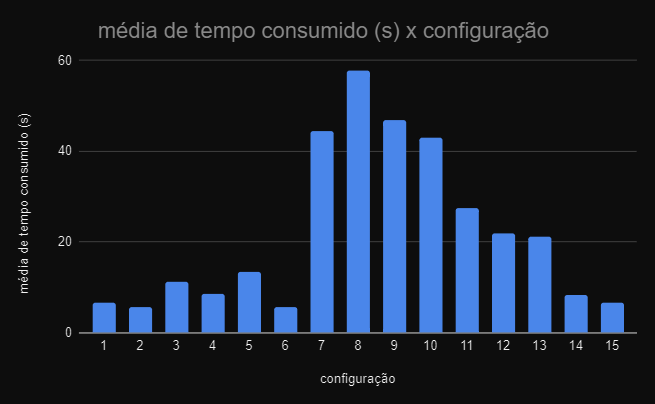




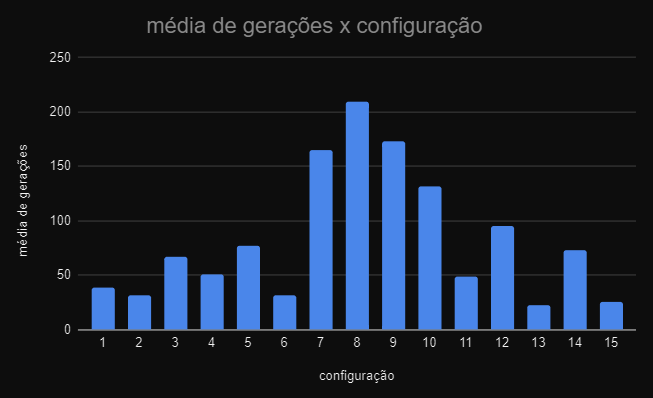



## **Comparações**
**Modificação no crossover: one-point vs two-points:**
    A utilização do two-points obteve, na maior parte da vezes, um desempenho um pouco superior ao one-point, a conclusão que tiramos dessa informação é que por o two-points proporcionar uma maior mesclagem entre os dois parentes ele aumeta a probabilidade de constituição de um indivíduo melhor.

**Modificação na taxa de mutação:**
    Como esperado, os resultados para uma maior taxa de mutação foram melhores que o de uma menor, mostando que, para o caso do problema do sudoku, é muito bom realizar modificações e gerar diversidade.

**Modifição no crossover: vertical_one_point vs one_point(random):**
    Como previsto, o vertical_one_point foi muito superior ao one_point, isso se deve principalmente ao fato do vertical_one_point prevenir a ocorrência de duplicatas das linhas o que melhora muito a qualidade dos filhos.

**Modificação na mutação: horizontal_swap vs swap(random) vs preenchimento de gene:**
    Como previsto o swap random e a preenchimento de gene são muito piores que o horizontal_swap, pois elas quebram a heuristica de sempre manter linhas sem duplicatas, o que causa, muitas vezes, a construção de filhos piores que os pais.

**Modificação de métodos de seleção: torneio vs roleta:**
  Observando-se os resultados e durante o desenvolvimento, pode-se observar que o método da roleta tende a cair mais em máximo locais, isso porque como o torrneio escolhe seus participante de forma aleatória, ele tende a criar mais diversidada. Porém vale constar que dependendo de como calculamos a probabilidade de cada elemento para a roleta ela tem desempenhos diferente, pode existir uma função que faça ela ser melhor que a do torneio, mas também pode não ser o caso, pois se a geração de novas populações for muito complexa, o desempenho ira diminuir mesmo que sejam feitas menos gerações.

**Modificação do número de indivíduos na população:**
    Obsevando-se o desempenho das situação com 600 indivíduos com as outras, pode-se observar a que tem população menor tem um pio desempenho, isso se da, pois nesse caso ele tende a encontrar mais máximos locais. Porém observando a configuração onde a população continua crescendo, pode-se observar que está tem um desempenho menor, pois muitos indivíduos geram uma convergência menor. Assim pode-se concluir que todo problema terá uma banda de indivíduos que maximiza o desempenho.

A configuração 8 (que faz swap entre partes aleatórias do sudoku, sem preservar linhas) se mostrou a pior configuração, tanto em número de gerações, quanto no tempo gasto.

Como esperado, as configurações que preservam linhas foram as mais eficientes. Isto, é crossover vertical, swap horizontal e forçando que cada linha seja uma permutação de range(1,10). Dessa forma, as linhas são preservadas e a função fitness fica mais barata, pois toda linha é consistente.

Em especial, a melhor configuração foi a segunda, que funciona com crossover vertical de dois pontos, mut_rate = 0.5, método de seleção de torneio e uma população inicial de tamanho médio (1000 indivíduos). Em média, essa configuração resolveu os sudokus em 5.7 segundos e com 32 gerações.





# RESOLVENDO PUZZLES UTILIZANDO A MELHOR CONFIGURAÇÃO ENCONTRADA

# Dificuldade 1

In [ ]:
problem = SudokuGeneticProblem(filename_initial_dict["s01b"], crossover_type="vertical_two_point", verbose=True)
(solution, number_of_generations, time_spent) = genetic_algorithm(problem, verbose=True)

print("TIME SPENT: " + str(time_spent) + " seconds" + "\n")

INITIAL PROBLEM:
[[8 0 2 0 5 0 7 0 1]
 [0 0 7 0 8 2 4 6 0]
 [0 1 0 9 0 0 0 0 0]
 [6 0 0 0 0 1 8 3 2]
 [5 0 0 0 0 0 0 0 9]
 [1 8 4 3 0 0 0 0 6]
 [0 0 0 0 0 4 0 2 0]
 [0 9 5 6 1 0 3 0 0]
 [3 0 8 0 9 0 6 0 7]]

INITIAL PROBLEM AFTER NAKED_SINGLES PRE-PROCESSING:
[[8 0 2 4 5 0 7 9 1]
 [9 0 7 1 8 2 4 6 0]
 [4 1 0 9 0 0 0 0 0]
 [6 7 9 0 0 1 8 3 2]
 [5 0 3 0 0 0 1 0 9]
 [1 8 4 3 0 0 5 0 6]
 [7 0 0 0 0 4 0 2 0]
 [0 9 5 6 1 0 3 0 0]
 [3 0 8 0 9 5 6 0 7]]

GEN 0 BEST INDIVIDUAL: 
[[8 3 2 4 5 6 7 9 1]
 [9 5 7 1 8 2 4 6 3]
 [4 1 6 9 2 5 7 8 3]
 [6 7 9 5 4 1 8 3 2]
 [5 4 3 8 6 2 1 7 9]
 [1 8 4 3 7 9 5 2 6]
 [7 6 1 3 8 4 9 2 5]
 [2 9 5 6 1 4 3 8 7]
 [3 4 8 2 9 5 6 1 7]]
 FITNESS = 224

GEN 1 BEST INDIVIDUAL: 
[[8 6 2 4 5 3 7 9 1]
 [9 5 7 1 8 2 4 6 3]
 [4 1 3 9 7 5 2 8 6]
 [6 7 9 4 5 1 8 3 2]
 [5 2 3 7 6 8 1 4 9]
 [1 8 4 3 2 9 5 7 6]
 [7 8 1 6 3 4 9 2 5]
 [2 9 5 6 1 7 3 4 8]
 [3 2 8 1 9 5 6 4 7]]
 FITNESS = 225

GEN 2 BEST INDIVIDUAL: 
[[8 6 2 4 5 3 7 9 1]
 [9 5 7 1 8 2 4 6 3]
 [4 1 6 9 3 7 2 5 8]
 [

# Dificuldade 2

In [ ]:
problem = SudokuGeneticProblem(filename_initial_dict["s02a"], crossover_type="vertical_two_point", verbose=True)
(solution, number_of_generations, time_spent) = genetic_algorithm(problem, verbose=True)

print("TIME SPENT: " + str(time_spent) + " seconds" + "\n")

Streaming output truncated to the last 5000 lines.
 [1 9 4 7 2 5 3 8 6]
 [3 4 6 5 8 7 9 1 2]
 [7 2 5 1 9 3 8 6 4]
 [1 8 9 4 6 2 5 7 3]
 [9 7 8 2 5 4 6 3 1]
 [5 6 2 3 1 8 4 9 7]
 [4 1 3 9 7 6 2 5 8]]
 FITNESS = 241

GEN 145 BEST INDIVIDUAL: 
[[2 5 6 8 3 1 7 4 9]
 [8 3 7 6 4 9 1 2 5]
 [1 9 4 7 2 5 3 8 6]
 [3 4 6 5 8 7 9 1 2]
 [7 2 5 1 9 3 8 6 4]
 [1 8 9 4 6 2 5 7 3]
 [9 7 8 2 5 4 6 3 1]
 [5 6 2 3 1 8 4 9 7]
 [4 1 3 9 7 6 2 5 8]]
 FITNESS = 241

GEN 146 BEST INDIVIDUAL: 
[[2 5 6 8 3 1 7 4 9]
 [8 3 7 6 4 9 1 2 5]
 [1 9 4 7 2 5 3 8 6]
 [3 4 6 5 8 7 9 1 2]
 [7 2 5 1 9 3 8 6 4]
 [1 8 9 4 6 2 5 7 3]
 [9 7 8 2 5 4 6 3 1]
 [5 6 2 3 1 8 4 9 7]
 [4 1 3 9 7 6 2 5 8]]
 FITNESS = 241

GEN 147 BEST INDIVIDUAL: 
[[2 5 6 8 3 1 7 4 9]
 [8 3 7 6 4 9 1 2 5]
 [1 9 4 7 2 5 3 8 6]
 [6 4 3 5 8 7 9 1 2]
 [7 2 5 1 9 3 8 6 4]
 [1 8 9 4 6 2 5 7 3]
 [9 7 8 2 5 4 6 3 1]
 [5 6 2 3 1 8 4 9 7]
 [4 1 3 9 7 6 2 5 8]]
 FITNESS = 241

GEN 148 BEST INDIVIDUAL: 
[[2 5 6 8 3 1 7 4 9]
 [8 3 7 6 4 9 1 2 5]
 [1 9 4 7 2 5 3 8 6]


# Dificuldade 3

In [ ]:
problem = SudokuGeneticProblem(filename_initial_dict["s03a"], crossover_type="vertical_two_point", verbose=True)
(solution, number_of_generations, time_spent) = genetic_algorithm(problem, verbose=True)

print("TIME SPENT: " + str(time_spent) + " seconds" + "\n")

Streaming output truncated to the last 5000 lines.
 [9 6 4 3 7 8 2 1 5]
 [4 9 5 7 3 1 6 2 8]
 [7 6 8 4 5 2 1 9 3]
 [2 4 3 1 8 6 5 7 9]
 [5 8 1 6 4 7 9 3 2]
 [4 7 9 5 2 3 8 6 1]
 [6 3 2 8 1 9 7 5 4]]
 FITNESS = 233

GEN 120 BEST INDIVIDUAL: 
[[8 5 7 2 1 4 3 9 6]
 [3 1 2 9 6 5 7 8 4]
 [9 6 4 3 7 8 2 1 5]
 [1 5 6 9 3 8 4 2 7]
 [7 9 8 4 5 2 1 6 3]
 [2 4 3 7 8 6 5 1 9]
 [5 8 1 6 4 7 9 3 2]
 [6 7 9 5 2 3 8 4 1]
 [4 3 2 8 1 9 6 5 7]]
 FITNESS = 234

GEN 121 BEST INDIVIDUAL: 
[[8 5 7 2 4 1 3 9 6]
 [3 1 2 9 6 5 7 8 4]
 [9 6 4 3 7 8 2 1 5]
 [1 9 5 7 3 4 6 2 8]
 [7 9 8 4 5 2 1 6 3]
 [2 4 3 1 8 6 5 7 9]
 [5 8 1 6 4 7 9 3 2]
 [6 7 9 5 2 3 8 4 1]
 [4 2 3 8 1 9 6 5 7]]
 FITNESS = 236

GEN 122 BEST INDIVIDUAL: 
[[8 5 7 2 1 4 3 9 6]
 [3 1 2 9 6 5 7 8 4]
 [9 6 4 3 7 8 2 1 5]
 [5 9 6 7 3 1 4 2 8]
 [7 9 8 4 5 2 1 6 3]
 [2 4 3 1 8 6 5 7 9]
 [5 8 1 6 4 7 9 3 2]
 [6 7 9 5 2 3 8 4 1]
 [4 3 2 8 1 9 6 5 7]]
 FITNESS = 237

GEN 123 BEST INDIVIDUAL: 
[[8 5 7 2 1 4 3 9 6]
 [3 1 2 9 6 5 7 8 4]
 [9 6 4 3 7 8 2 1 5]


# Dificuldade 4

In [ ]:
problem = SudokuGeneticProblem(filename_initial_dict["s04a"], crossover_type="vertical_two_point", verbose=True)
(solution, number_of_generations, time_spent) = genetic_algorithm(problem, verbose=True)

print("TIME SPENT: " + str(time_spent) + " seconds" + "\n")

Streaming output truncated to the last 5000 lines.
 [9 3 6 1 5 7 2 8 4]
 [5 6 8 2 4 9 1 3 7]
 [4 9 2 3 7 1 5 6 8]
 [1 7 3 6 8 5 9 4 2]
 [3 2 1 5 6 8 4 9 7]
 [6 4 5 9 7 3 8 2 1]
 [7 8 9 4 1 2 3 6 5]]
 FITNESS = 239

GEN 2374 BEST INDIVIDUAL: 
[[8 5 7 2 9 4 6 1 3]
 [2 1 4 8 3 6 7 5 9]
 [9 3 6 1 5 7 2 8 4]
 [5 6 8 2 4 9 1 3 7]
 [4 9 2 3 7 1 5 6 8]
 [1 7 3 6 8 5 9 4 2]
 [3 2 1 5 6 8 4 9 7]
 [6 4 5 9 7 3 8 2 1]
 [7 8 9 4 1 2 3 6 5]]
 FITNESS = 239

GEN 2375 BEST INDIVIDUAL: 
[[8 5 7 2 9 4 6 1 3]
 [2 1 4 8 3 6 7 5 9]
 [9 3 6 1 5 7 2 8 4]
 [5 6 8 2 4 9 1 3 7]
 [4 9 2 3 7 1 5 8 6]
 [1 7 3 6 8 5 9 4 2]
 [3 2 1 5 6 8 4 9 7]
 [6 4 5 9 7 3 8 2 1]
 [7 8 9 4 1 2 3 6 5]]
 FITNESS = 239

GEN 2376 BEST INDIVIDUAL: 
[[8 5 7 2 9 4 6 1 3]
 [2 1 4 8 3 6 7 5 9]
 [9 3 6 1 5 7 2 8 4]
 [5 6 8 2 4 9 1 3 7]
 [4 9 2 3 7 1 5 6 8]
 [1 7 3 6 8 5 9 4 2]
 [3 2 1 5 6 8 4 9 7]
 [6 4 5 9 7 3 8 2 1]
 [7 8 9 4 1 2 3 6 5]]
 FITNESS = 239

GEN 2377 BEST INDIVIDUAL: 
[[8 5 7 2 9 4 6 1 3]
 [2 1 4 8 3 6 7 5 9]
 [9 3 6 1 5 7 2 8

# Dificuldade 5

In [ ]:
problem = SudokuGeneticProblem(filename_initial_dict["s05c"], crossover_type="vertical_two_point", verbose=True)
(solution, number_of_generations, time_spent) = genetic_algorithm(problem, verbose=True)

print("TIME SPENT: " + str(time_spent) + " seconds" + "\n")

Streaming output truncated to the last 5000 lines.
 [2 5 4 8 6 9 1 3 7]
 [4 7 6 9 8 3 5 1 2]
 [8 2 3 1 5 6 7 9 4]
 [5 1 9 4 2 7 6 8 3]
 [6 4 5 3 7 1 8 2 9]
 [7 3 8 5 9 2 4 6 1]
 [1 9 2 6 4 8 3 7 5]]
 FITNESS = 241

GEN 1302 BEST INDIVIDUAL: 
[[3 6 1 7 2 5 9 4 8]
 [9 8 7 3 1 4 2 5 6]
 [2 5 4 8 6 9 1 3 7]
 [4 7 6 9 8 3 5 1 2]
 [8 2 3 1 5 6 7 9 4]
 [5 1 9 4 2 7 6 8 3]
 [6 4 5 3 7 1 8 2 9]
 [7 3 8 5 9 2 4 6 1]
 [1 9 2 6 4 8 3 7 5]]
 FITNESS = 241

GEN 1303 BEST INDIVIDUAL: 
[[3 6 1 7 2 5 9 4 8]
 [9 8 7 3 1 4 2 5 6]
 [2 5 4 8 6 9 1 3 7]
 [4 7 6 9 8 3 5 1 2]
 [8 2 3 1 5 6 7 9 4]
 [5 1 9 4 2 7 6 8 3]
 [6 4 5 3 7 1 8 2 9]
 [7 3 8 5 9 2 4 6 1]
 [1 9 2 6 4 8 3 7 5]]
 FITNESS = 241

GEN 1304 BEST INDIVIDUAL: 
[[3 6 1 7 2 5 9 4 8]
 [9 8 7 3 1 4 2 5 6]
 [2 5 4 8 6 9 1 3 7]
 [4 7 6 9 8 3 5 1 2]
 [8 2 3 1 5 6 7 9 4]
 [5 1 9 4 2 7 6 8 3]
 [6 4 5 3 7 1 8 2 9]
 [7 3 8 5 9 2 4 6 1]
 [1 9 2 6 4 8 3 7 5]]
 FITNESS = 241

GEN 1305 BEST INDIVIDUAL: 
[[3 6 1 7 2 5 9 4 8]
 [9 8 7 3 1 4 2 5 6]
 [2 5 4 8 6 9 1 3